In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from seminartools.data import read_merged
from seminartools.models.four_quarter_average_model import FourQuarterAverageModel
from seminartools.models.armax_model import ARMAXModel
from seminartools.models.uc_sv_ss_model import UCSVSSModel
from seminartools.models.random_effects_model import RandomEffectsModel
from seminartools.models.distance_model import DistanceModel
from seminartools.models.cov_bhm_model import CovBHMModel
from seminartools.models.utils import make_oos_predictions

In [4]:
df = read_merged().reset_index()
df

c:\users\vandi\onedrive\documenten\github\seminar\seminartools\data.py:173: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df = df.resample("Q").apply(lambda x: (1 + x).prod() - 1)  # quarterly return
c:\users\vandi\onedrive\documenten\github\seminar\seminartools\data.py:409: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df = df.resample("Q").mean()  # Mean interest rate


,country,date,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET
0,Japan,1977-01-01,0.022951,2.187257,6.333333,2.3,0.00000,0.052425,0.144757,0.041940,0.112740
1,Canada,1977-01-01,0.023904,1.533830,8.166667,8.8,0.00000,0.052425,0.144757,0.041940,0.112740
2,United States,1977-01-01,0.017231,1.186233,4.700000,8.2,0.00000,0.052425,0.144757,0.041940,0.112740
3,Japan,1977-04-01,0.027244,0.703788,5.000000,2.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
4,Canada,1977-04-01,0.023346,0.510302,7.666667,8.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
...,...,...,...,...,...,...,...,...,...,...,...
2166,Italy,2023-01-01,0.003938,0.552944,3.000000,8.3,-0.02041,-0.585458,0.002037,0.007418,0.043183
2167,Canada,2023-01-01,0.006080,0.610026,4.500000,5.4,-0.02041,-0.585458,0.002037,0.007418,0.043183
2168,Sweden,2023-01-01,0.014955,0.656897,2.833333,7.8,-0.02041,-0.585458,0.002037,0.007418,0.043183
2169,Korea,2023-01-01,0.010538,0.329875,3.500000,3.2,-0.02041,-0.585458,0.002037,0.007418,0.043183


In [5]:
# expanding window crossval
from seminartools.time_series_split import ExpandingWindowSplit

tss = ExpandingWindowSplit(start_date = "2000-01-01")
tss

In [10]:
preds_ao = make_oos_predictions(lambda: FourQuarterAverageModel(), df,tss,progress=True)
preds_ao

Splits: 100%|██████████| 5/5 [00:01<00:00,  3.82it/s]


,date,country,inflation
0,2000-01-01,Australia,0.004734
1,2000-01-01,Belgium,0.004127
2,2000-01-01,Canada,0.005831
3,2000-01-01,Denmark,0.007820
4,2000-01-01,France,0.000000
...,...,...,...
1829,2023-01-01,Sweden,0.027675
1830,2023-01-01,Switzerland,0.007345
1831,2023-01-01,Türkiye,NaN
1832,2023-01-01,United Kingdom,NaN


In [11]:
preds_ar = make_oos_predictions(lambda: ARMAXModel(max_p = 2, max_q = 0), df, tss, progress = True, num_cores = 5)
preds_ar

Splits: 100%|██████████| 5/5 [00:01<00:00,  4.05it/s]


,date,country,inflation
0,1999-04-01,Japan,0.007393
1,2000-01-01,Canada,0.005906
2,2000-01-01,United States,0.007314
3,2000-01-01,Australia,0.008921
4,2000-01-01,New Zealand,0.004144
...,...,...,...
1516,2023-01-01,Norway,0.001250
1517,2023-01-01,Belgium,0.011892
1518,2023-01-01,Korea,0.006259
1519,2023-01-01,South Africa,0.012260


In [ ]:
preds_ucsv = make_oos_predictions(
    lambda: UCSVSSModel(num_particles=10000, stochastic_seasonality=False, pointwise_aggregation_method="distribution"),
    df,
    tss,
    progress=True,
    num_cores = 8
)
preds_ucsv

Splits:   0%|          | 0/5 [00:00<?, ?it/s]

Fitting model on the full dataset... (model=<seminartools.models.uc_sv_ss_model.UCSVSSModel object at 0x00000198AD9869D0>)


100%|██████████| 20/20 [00:00<00:00, 42.41it/s]


Fitted!


Splits: 100%|██████████| 5/5 [01:16<00:00, 15.34s/it]


,inflation,country,date
0,"{'pdf': [1.8393855859275771e-06, 1.83743211391...",Japan,1999-04-01
1,"{'pdf': [1.6969091796958231e-06, 1.69539579369...",Canada,2000-01-01
2,"{'pdf': [1.5680551179665677e-06, 1.58251458706...",United States,2000-01-01
3,"{'pdf': [3.347783486695864e-06, 3.455127988778...",Australia,2000-01-01
4,"{'pdf': [2.9864402334666775e-06, 2.98434988284...",New Zealand,2000-01-01
...,...,...,...
1829,"{'pdf': [1.2102357763938661e-06, 1.21047230417...",Norway,2023-01-01
1830,"{'pdf': [1.2940480869273069e-06, 1.29893590952...",Belgium,2023-01-01
1831,"{'pdf': [1.4302927430912842e-06, 1.42937399115...",Korea,2023-01-01
1832,"{'pdf': [1.3797475398124396e-06, 1.38084268429...",South Africa,2023-01-01


In [ ]:
preds_ucsv_ss = make_oos_predictions(
    lambda: UCSVSSModel(num_particles=10000, stochastic_seasonality=True, pointwise_aggregation_method="distribution"),
    df,
    tss,
    progress=True,
    num_cores = 8
)
preds_ucsv_ss

Splits:   0%|          | 0/5 [00:00<?, ?it/s]

Fitting model on the full dataset... (model=<seminartools.models.uc_sv_ss_model.UCSVSSModel object at 0x00000198AD055E10>)


100%|██████████| 20/20 [00:01<00:00, 14.10it/s]


Fitted!


Splits: 100%|██████████| 5/5 [01:12<00:00, 14.46s/it]


,inflation,country,date
0,"{'pdf': [1.6557667977723314e-19, 1.24182509832...",Japan,1999-04-01
1,"{'pdf': [2.7560772271737393e-19, 3.67476963623...",Canada,2000-01-01
2,"{'pdf': [-1.0416308905285307e-19, 2.0832617810...",United States,2000-01-01
3,"{'pdf': [0.0, -1.5416866363237669e-19, 3.85421...",Australia,2000-01-01
4,"{'pdf': [2.1567173287276683e-19, 3.88209119170...",New Zealand,2000-01-01
...,...,...,...
1829,"{'pdf': [6.9856337418441205e-19, 3.02710795479...",Norway,2023-01-01
1830,"{'pdf': [4.9872439756390026e-20, -1.6624146585...",Belgium,2023-01-01
1831,"{'pdf': [0.0, 3.014519696172818e-19, 1.5072598...",Korea,2023-01-01
1832,"{'pdf': [-1.3112806888809016e-19, -3.933842066...",South Africa,2023-01-01


In [ ]:
preds_db = make_oos_predictions(
    lambda: DistanceModel(pointwise_aggregation_method="distribution"),
    df,
    tss,
    progress=True,
    num_cores=5,
)
preds_db

Splits: 100%|██████████| 5/5 [00:00<00:00, 10.69it/s]


,country,inflation,date
0,Australia,"{'pdf': [2.558139222255306e-06, 2.580605580368...",2000-01-01
1,Belgium,"{'pdf': [1.4739539900124717e-06, 1.47427494049...",2000-01-01
2,Canada,"{'pdf': [6.04796252075875e-06, 6.1364636444259...",2000-01-01
3,Denmark,"{'pdf': [3.7977540379539945e-06, 3.85633945703...",2000-01-01
4,Italy,"{'pdf': [1.5311461067388512e-06, 1.53080062112...",2000-01-01
...,...,...,...
1648,South Africa,"{'pdf': [1.4181385792426276e-06, 1.41848558429...",2023-01-01
1649,Spain,"{'pdf': [1.4666884197947374e-06, 1.46870282293...",2023-01-01
1650,Sweden,"{'pdf': [3.048014991735898e-06, 3.094161140662...",2023-01-01
1651,Switzerland,"{'pdf': [1.6168883279713992e-06, 1.61643647969...",2023-01-01


In [ ]:
preds_re = make_oos_predictions(
    lambda: RandomEffectsModel(pointwise_aggregation_method="distribution"),
    df,
    tss,
    progress=True,
    num_cores = 5
)

Splits: 100%|██████████| 5/5 [00:00<00:00, 424.04it/s]


In [6]:
preds_cov_bhm = make_oos_predictions(
    lambda: CovBHMModel(pointwise_aggregation_method="distribution"),
    df,
    tss,
    progress=True,
    num_cores = 8
)
preds_cov_bhm

Splits: 100%|██████████| 5/5 [00:00<00:00, 269.43it/s]


,country,inflation,date
0,Australia,"{'pdf': [1.7579463917907273e-06, 1.77020150594...",2000-01-01
1,Belgium,"{'pdf': [1.5530819832134785e-06, 1.55265888561...",2000-01-01
2,Canada,"{'pdf': [2.9895643683097456e-06, 3.02919284622...",2000-01-01
3,Denmark,"{'pdf': [6.721995601129991e-06, 6.804606668402...",2000-01-01
4,Italy,"{'pdf': [4.032524873329799e-06, 4.098731402367...",2000-01-01
...,...,...,...
1648,South Africa,"{'pdf': [2.88006721235999e-06, 2.9166286202980...",2023-01-01
1649,Spain,"{'pdf': [2.7824447235857093e-06, 2.80061842103...",2023-01-01
1650,Sweden,"{'pdf': [4.168669625497729e-06, 4.242719618975...",2023-01-01
1651,Switzerland,"{'pdf': [1.6057917996472157e-06, 1.60573604834...",2023-01-01


In [38]:
pred_ucsv_high = preds_ucsv.query("country == 'United States'").query("date == '10-01-2022'")["inflation"].values[0]
pred_ucsv_ss_high = preds_ucsv_ss.query("country == 'United States'").query("date == '10-01-2022'")["inflation"].values[0]
pred_db_high = preds_db.query("country == 'United States'").query("date == '10-01-2022'")["inflation"].values[0]
pred_re_high = preds_re.query("country == 'United States'").query("date == '10-01-2022'")["inflation"].values[0]
pred_ao_high = preds_ao.query("country == 'United States'").query("date == '10-01-2022'")["inflation"].values[0]
pred_ar_high = preds_ar.query("country == 'United States'").query("date == '10-01-2022'")["inflation"].values[0]
pred_cov_bhm_high = preds_cov_bhm.query("country == 'United States'").query("date == '10-01-2022'")["inflation"].values[0]
actual_inflation_high = df.query("country == 'United States'").query("date == '10-01-2022'")["inflation"].values[0]

C:\Users\vandi\AppData\Local\Temp\ipykernel_11716\4149609287.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  pred_ucsv_high = preds_ucsv.query("country == 'United States'").query("date == '10-01-2022'")["inflation"].values[0]
C:\Users\vandi\AppData\Local\Temp\ipykernel_11716\4149609287.py:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  pred_ucsv_ss_high = preds_ucsv_ss.query("country == 'United States'").query("date == '10-01-2022'")["inflation"].values[0]
C:\Users\vandi\AppData\Local\Temp\ipykernel_11716\4149609287.py:3: FutureWarning: The behavior of 'isin' with dtype=da

In [39]:
pred_ucsv_stable = preds_ucsv.query("country == 'United States'").query("date == '01-01-2006'")["inflation"].values[0]
pred_ucsv_ss_stable = preds_ucsv_ss.query("country == 'United States'").query("date == '01-01-2006'")["inflation"].values[0]
pred_db_stable = preds_db.query("country == 'United States'").query("date == '01-01-2006'")["inflation"].values[0]
pred_re_stable = preds_re.query("country == 'United States'").query("date == '01-01-2006'")["inflation"].values[0]
pred_ao_stable = preds_ao.query("country == 'United States'").query("date == '01-01-2006'")["inflation"].values[0]
pred_ar_stable = preds_ar.query("country == 'United States'").query("date == '01-01-2006'")["inflation"].values[0]
pred_cov_bhm_stable = preds_cov_bhm.query("country == 'United States'").query("date == '01-01-2006'")["inflation"].values[0]
actual_inflation_stable = df.query("country == 'United States'").query("date == '01-01-2006'")["inflation"].values[0]

C:\Users\vandi\AppData\Local\Temp\ipykernel_11716\2183670973.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  pred_ucsv_stable = preds_ucsv.query("country == 'United States'").query("date == '01-01-2006'")["inflation"].values[0]
C:\Users\vandi\AppData\Local\Temp\ipykernel_11716\2183670973.py:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  pred_ucsv_ss_stable = preds_ucsv_ss.query("country == 'United States'").query("date == '01-01-2006'")["inflation"].values[0]
C:\Users\vandi\AppData\Local\Temp\ipykernel_11716\2183670973.py:3: FutureWarning: The behavior of 'isin' with dtyp

In [40]:
import numpy as np
maxVal_high = max(max(pred_ucsv_high["inflation_grid"]),max(pred_ucsv_ss_high["inflation_grid"]),max(pred_db_high["inflation_grid"]), max(pred_re_high["inflation_grid"]),max(pred_cov_bhm_high["inflation_grid"]))
minVal_high = min(min(pred_ucsv_high["inflation_grid"]),min(pred_ucsv_ss_high["inflation_grid"]), min(pred_db_high["inflation_grid"]), min(pred_re_high["inflation_grid"]),min(pred_cov_bhm_high["inflation_grid"]))
x_axis_high = np.linspace(minVal_high,maxVal_high,1999)
maxVal_stable = max(max(pred_ucsv_stable["inflation_grid"]),max(pred_ucsv_ss_stable["inflation_grid"]), max(pred_db_stable["inflation_grid"]),max(pred_re_stable["inflation_grid"]),max(pred_cov_bhm_stable["inflation_grid"]))
minVal_stable = min(min(pred_ucsv_stable["inflation_grid"]), min(pred_ucsv_ss_stable["inflation_grid"]), min(pred_db_stable["inflation_grid"]), min(pred_re_stable["inflation_grid"]),min(pred_cov_bhm_stable["inflation_grid"]))
x_axis_stable = np.linspace(minVal_stable,maxVal_stable, 1999)

In [41]:
import numpy as np
pred_ucsv_high_plot = np.interp(x_axis_high, pred_ucsv_high["inflation_grid"], pred_ucsv_high["pdf"])
pred_ucsv_ss_high_plot = np.interp(x_axis_high, pred_ucsv_ss_high["inflation_grid"], pred_ucsv_high["pdf"])
pred_db_high_plot = np.interp(x_axis_high, pred_db_high["inflation_grid"], pred_db_high["pdf"])
pred_re_high_plot = np.interp(x_axis_high, pred_re_high["inflation_grid"], pred_re_high["pdf"])
pred_cov_bhm_high_plot = np.interp(x_axis_high, pred_cov_bhm_high["inflation_grid"], pred_cov_bhm_high["pdf"])

pred_ucsv_stable_plot = np.interp(x_axis_stable, pred_ucsv_stable["inflation_grid"], pred_ucsv_stable["pdf"])
pred_ucsv_ss_stable_plot = np.interp(x_axis_stable, pred_ucsv_ss_stable["inflation_grid"], pred_ucsv_ss_stable["pdf"])
pred_db_stable_plot = np.interp(x_axis_stable, pred_db_stable["inflation_grid"], pred_db_stable["pdf"])
pred_re_stable_plot = np.interp(x_axis_stable, pred_re_stable["inflation_grid"], pred_re_stable["pdf"])
pred_cov_bhm_stable_plot = np.interp(x_axis_stable, pred_cov_bhm_stable["inflation_grid"], pred_cov_bhm_stable["pdf"])

In [42]:
#normalize to densities
from scipy.integrate import simps
def normalize_density(density):
    area = simps(density)
    return density / area

pred_ucsv_stable_plot = normalize_density(pred_ucsv_stable_plot)
pred_ucsv_ss_stable_plot = normalize_density(pred_ucsv_ss_stable_plot)
pred_re_stable_plot = normalize_density(pred_re_stable_plot)
pred_db_stable_plot = normalize_density(pred_db_stable_plot)
pred_cov_bhm_stable_plot = normalize_density(pred_cov_bhm_stable_plot)

pred_ucsv_high_plot = normalize_density(pred_ucsv_high_plot)
pred_ucsv_ss_high_plot = normalize_density(pred_ucsv_ss_high_plot)
pred_re_high_plot = normalize_density(pred_re_high_plot)
pred_db_high_plot = normalize_density(pred_db_high_plot)
pred_cov_bhm_high_plot = normalize_density(pred_cov_bhm_high_plot)

C:\Users\vandi\AppData\Local\Temp\ipykernel_11716\3160782926.py:4: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  area = simps(density)


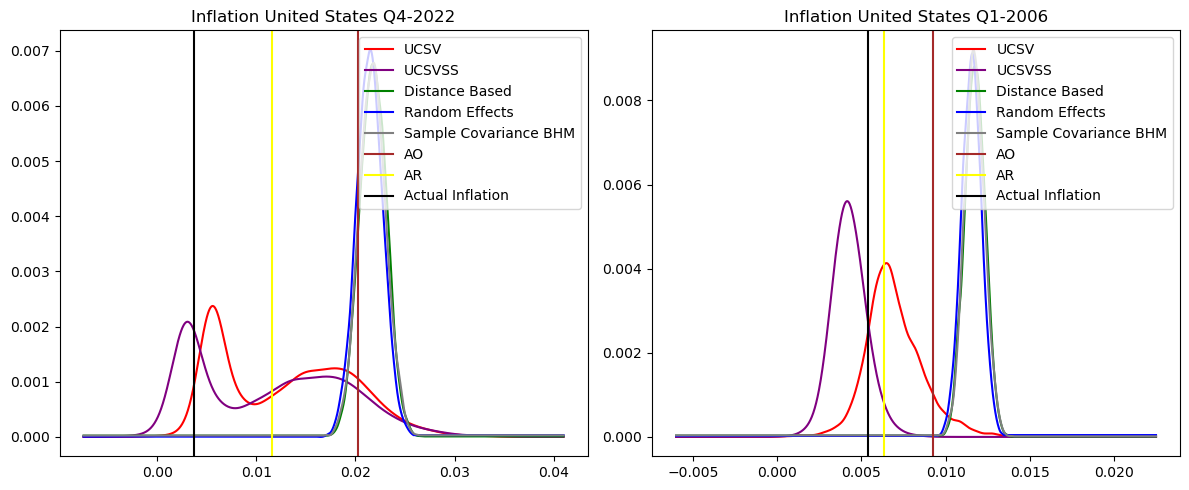

In [43]:
import matplotlib.pyplot as plt
figures, axes = plt.subplots(1,2, figsize = (12,5))

axes[0].plot(
    x_axis_high,
    pred_ucsv_high_plot,
    label = "UCSV",
    color = "red"
)
axes[0].plot(
    x_axis_high,
    pred_ucsv_ss_high_plot,
    label = "UCSVSS",
    color = "purple"
)
axes[0].plot(
    x_axis_high,
    pred_db_high_plot,
    label = "Distance Based",
    color = "green"
)
axes[0].plot(
    x_axis_high,
    pred_re_high_plot,
    label = "Random Effects",
    color = "blue"
)
axes[0].plot(
    x_axis_high,
    pred_cov_bhm_high_plot,
    label = "Sample Covariance BHM",
    color = "grey"
)
axes[0].axvline(pred_ao_high, color = "brown", label = "AO")
axes[0].axvline(pred_ar_high,color = "yellow", label = "AR")
axes[0].axvline(actual_inflation_high, color = "black", label = "Actual Inflation")
axes[0].legend(loc = "upper right")
axes[0].set_title("Inflation United States Q4-2022")

axes[1].plot(
    x_axis_stable,
    pred_ucsv_stable_plot,
    label = "UCSV",
    color = "red"
)
axes[1].plot(
    x_axis_stable,
    pred_ucsv_ss_stable_plot,
    label = "UCSVSS",
    color = "purple"
)
axes[1].plot(
    x_axis_stable,
    pred_db_stable_plot,
    label = "Distance Based",
    color = "green"
)
axes[1].plot(
    x_axis_stable,
    pred_re_stable_plot,
    label = "Random Effects",
    color = "blue"
)
axes[1].plot(
    x_axis_stable,
    pred_cov_bhm_stable_plot,
    label = "Sample Covariance BHM",
    color = "grey"
)
axes[1].axvline(pred_ao_stable, color = "brown", label = "AO")
axes[1].axvline(pred_ar_stable,color = "yellow", label = "AR")
axes[1].axvline(actual_inflation_stable, color = "black", label = "Actual Inflation")
axes[1].set_title("Inflation United States Q1-2006")
axes[1].legend(loc = "upper right")
plt.tight_layout()

## Distributions over time

load predictions of the distributions

In [1]:
import pickle
preds_re_distribution = pickle.load(open("../../models/preds_re_distribution.pkl" , 'rb'))
preds_db_distribution = pickle.load(open("../../models/preds_db_distribution.pkl" , 'rb'))
preds_ucsv_distribution = pickle.load(open("../../models/preds_ucsv_distribution.pkl" , 'rb'))
preds_ucsv_ss_distribution = pickle.load(open("../../models/preds_ucsv_ss_distribution.pkl" , 'rb'))

In [6]:
preds_re_distribution['country'].unique()

array(['Australia', 'Belgium', 'Canada', 'Denmark', 'Italy', 'Korea',
       'New Zealand', 'Portugal', 'Spain', 'United Kingdom',
       'United States', 'Netherlands', 'Norway', 'Japan', 'Sweden',
       'France', 'Germany', 'Türkiye', 'South Africa', 'Switzerland'],
      dtype=object)

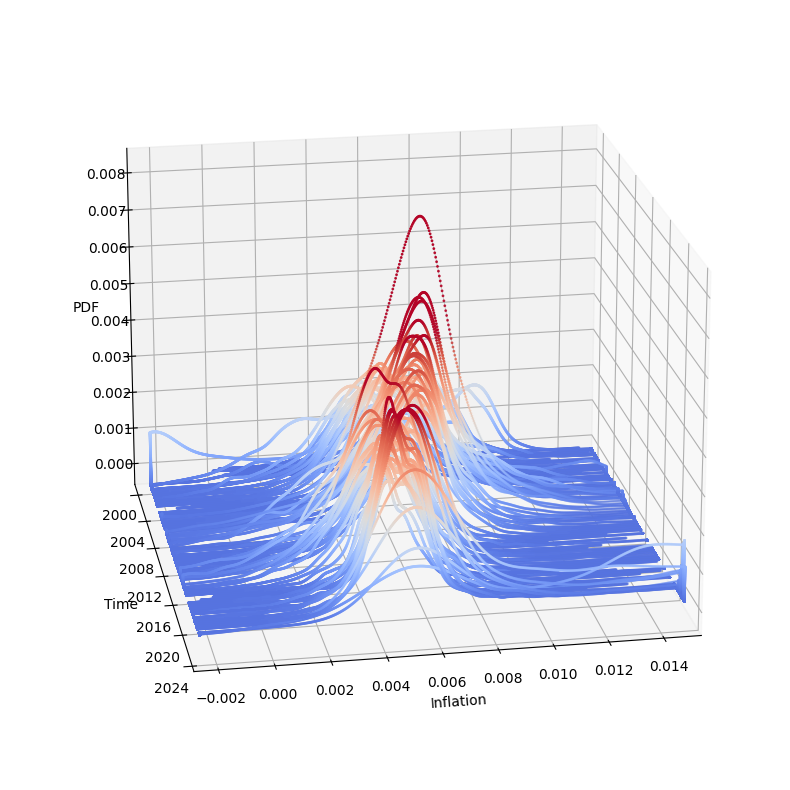

In [ ]:
country_to_plot = "United States"
# filter for country
preds_country = preds_ucsv_distribution.query("country == @country_to_plot")
# remove data before 2000
preds_country = preds_country.query("date >= '01-01-2000'")
df = preds_country.copy()

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from matplotlib.colors import Normalize
from matplotlib.cm import coolwarm

# Assuming df is your DataFrame

# Define your clipping bounds for inflation
inflation_min = -0.0025
inflation_max = 0.015

# Prepare the figure and the 3D subplot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Convert dates to numbers for plotting purposes
date_nums = mdates.date2num(df['date'])

# Normalize object to map the pdf values to the [0, 1] interval
norm = Normalize(vmin=-0.0005,
                 vmax=0.005)

# Get the colormap
colormap = plt.get_cmap('coolwarm')

# Plot each 'pdf' against the clipped 'inflation_grid' for each date
for date_num, inflation_dict in zip(date_nums, df['inflation']):
    pdf = inflation_dict['pdf']
    inflation_grid = np.clip(inflation_dict['inflation_grid'], inflation_min, inflation_max)
    ys = np.full_like(pdf, fill_value=date_num)  # Use the numerical date for the y-axis

    # Plot the line in 3D with a basic color
    ax.plot(inflation_grid, ys, pdf, color='grey', linewidth=0.5, alpha=0.5)

    # Scatter plot over the line to give the illusion of color gradient
    scatter = ax.scatter(inflation_grid, ys, pdf, c=pdf, cmap=colormap, norm=norm, s=1)

# Set the y-axis to have date ticks
ax.yaxis.set_major_locator(mdates.AutoDateLocator())
ax.yaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Labels
ax.set_xlabel('Inflation')
ax.set_ylabel('Time')
ax.set_zlabel('PDF')

# Invert the x-axis and set limits
ax.set_xlim(inflation_max, inflation_min)

# Adjust the view angle for better visualization
ax.view_init(elev=20, azim=80)

# Display the plot
plt.show()


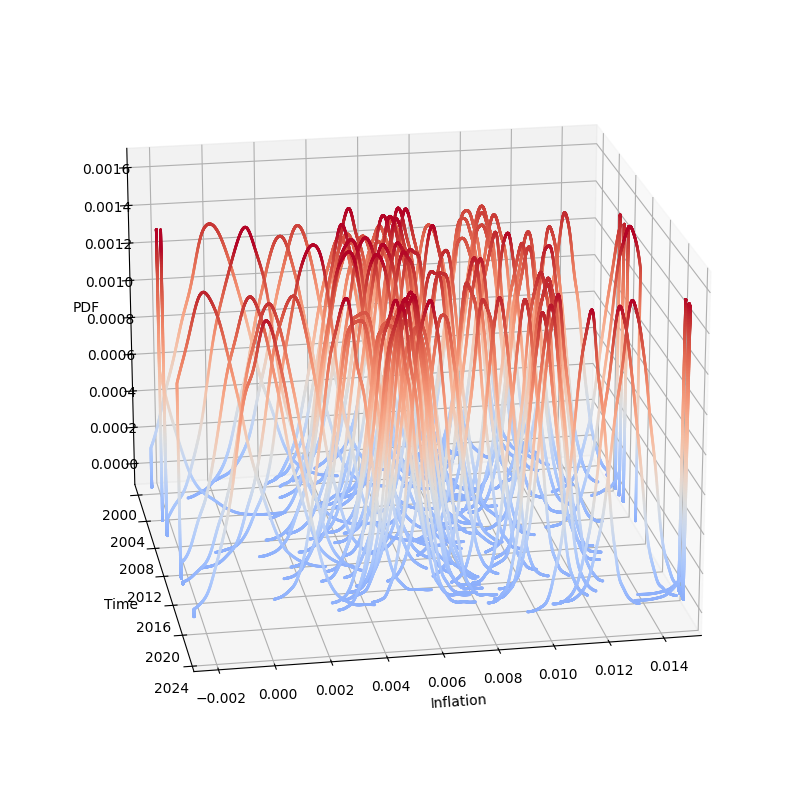

In [27]:
country_to_plot = "United States"
# filter for country
preds_country = preds_ucsv_ss_distribution.query("country == @country_to_plot")
# remove data before 2000
preds_country = preds_country.query("date >= '01-01-2000'")
# Only predictions of the first quarter of each year
df = preds_country.copy()
#df = df[df['date'].dt.month.isin([1,2,3])]
#df = df[df['date'].dt.month.isin([4,5,6])]
#df = df[df['date'].dt.month.isin([7,8,9])]
#df = df[df['date'].dt.month.isin([10,11,12])]

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from matplotlib.colors import Normalize
from matplotlib.cm import coolwarm

# Assuming df is your DataFrame

# Define your clipping bounds for inflation
inflation_min = -0.0025
inflation_max = 0.015

# Prepare the figure and the 3D subplot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Convert dates to numbers for plotting purposes
date_nums = mdates.date2num(df['date'])

# Normalize object to map the pdf values to the [0, 1] interval
norm = Normalize(vmin=-0.0005,
                 vmax=0.0015)

# Get the colormap
colormap = plt.get_cmap('coolwarm')

# Plot each 'pdf' against the clipped 'inflation_grid' for each date
for date_num, inflation_dict in zip(date_nums, df['inflation']):
    pdf = inflation_dict['pdf']
    inflation_grid = np.clip(inflation_dict['inflation_grid'], inflation_min, inflation_max)
    ys = np.full_like(pdf, fill_value=date_num)  # Use the numerical date for the y-axis

    # Plot the line in 3D with a basic color
    ax.plot(inflation_grid, ys, pdf, color='grey', linewidth=0.5, alpha=0.5)

    # Scatter plot over the line to give the illusion of color gradient
    scatter = ax.scatter(inflation_grid, ys, pdf, c=pdf, cmap=colormap, norm=norm, s=1)

# Set the y-axis to have date ticks
ax.yaxis.set_major_locator(mdates.AutoDateLocator())
ax.yaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Labels
ax.set_xlabel('Inflation')
ax.set_ylabel('Time')
ax.set_zlabel('PDF')

# Invert the x-axis and set limits
ax.set_xlim(inflation_max, inflation_min)

# Adjust the view angle for better visualization
ax.view_init(elev=20, azim=80)

# Display the plot
plt.show()


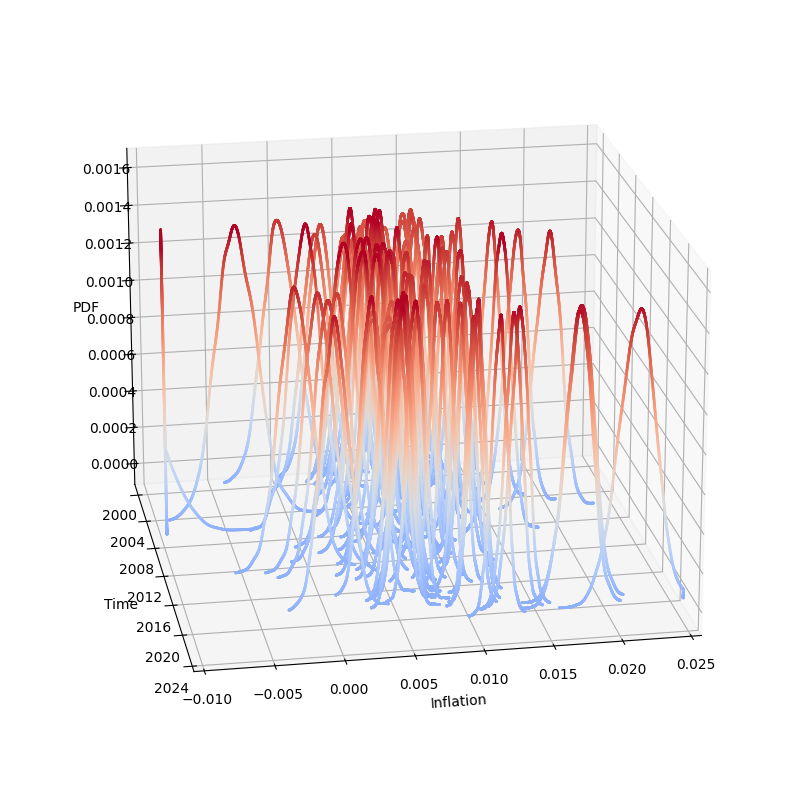

In [16]:
country_to_plot = "United States"
# filter for country
preds_country = preds_re_distribution.query("country == @country_to_plot")
# remove data before 2000
preds_country = preds_country.query("date >= '01-01-2000'")
df = preds_country.copy()

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from matplotlib.colors import Normalize
from matplotlib.cm import coolwarm

# Assuming df is your DataFrame

# Define your clipping bounds for inflation
inflation_min = -0.01
inflation_max = 0.025

# Prepare the figure and the 3D subplot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Convert dates to numbers for plotting purposes
date_nums = mdates.date2num(df['date'])

# Normalize object to map the pdf values to the [0, 1] interval
norm = Normalize(vmin=-0.0005,
                 vmax=0.0015)

# Get the colormap
colormap = plt.get_cmap('coolwarm')

# Plot each 'pdf' against the clipped 'inflation_grid' for each date
for date_num, inflation_dict in zip(date_nums, df['inflation']):
    pdf = inflation_dict['pdf']
    inflation_grid = np.clip(inflation_dict['inflation_grid'], inflation_min, inflation_max)
    ys = np.full_like(pdf, fill_value=date_num)  # Use the numerical date for the y-axis

    # Plot the line in 3D with a basic color
    ax.plot(inflation_grid, ys, pdf, color='grey', linewidth=0.5, alpha=0.5)

    # Scatter plot over the line to give the illusion of color gradient
    scatter = ax.scatter(inflation_grid, ys, pdf, c=pdf, cmap=colormap, norm=norm, s=1)

# Set the y-axis to have date ticks
ax.yaxis.set_major_locator(mdates.AutoDateLocator())
ax.yaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Labels
ax.set_xlabel('Inflation')
ax.set_ylabel('Time')
ax.set_zlabel('PDF')

# Invert the x-axis and set limits
ax.set_xlim(inflation_max, inflation_min)

# Adjust the view angle for better visualization
ax.view_init(elev=20, azim=80)

# Display the plot
plt.show()


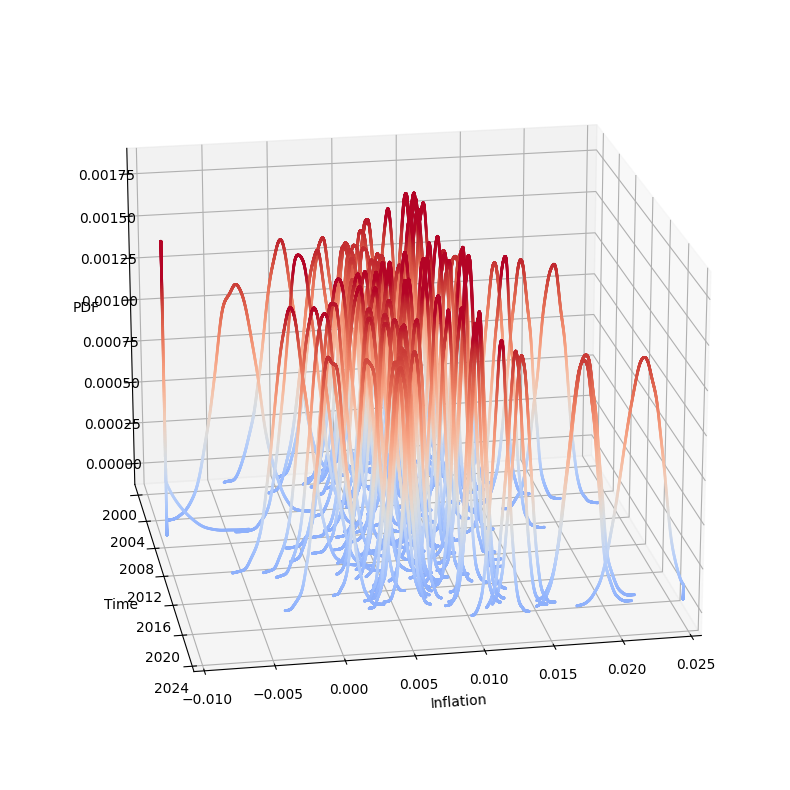

In [13]:
country_to_plot = "United States"
# filter for country
preds_country = preds_db_distribution.query("country == @country_to_plot")
# remove data before 2000
preds_country = preds_country.query("date >= '01-01-2000'")
df = preds_country.copy()

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from matplotlib.colors import Normalize
from matplotlib.cm import coolwarm

# Assuming df is your DataFrame

# Define your clipping bounds for inflation
inflation_min = -0.01
inflation_max = 0.025

# Prepare the figure and the 3D subplot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Convert dates to numbers for plotting purposes
date_nums = mdates.date2num(df['date'])

# Normalize object to map the pdf values to the [0, 1] interval
norm = Normalize(vmin=-0.0005,
                 vmax=0.0015)

# Get the colormap
colormap = plt.get_cmap('coolwarm')

# Plot each 'pdf' against the clipped 'inflation_grid' for each date
for date_num, inflation_dict in zip(date_nums, df['inflation']):
    pdf = inflation_dict['pdf']
    inflation_grid = np.clip(inflation_dict['inflation_grid'], inflation_min, inflation_max)
    ys = np.full_like(pdf, fill_value=date_num)  # Use the numerical date for the y-axis

    # Plot the line in 3D with a basic color
    ax.plot(inflation_grid, ys, pdf, color='grey', linewidth=0.5, alpha=0.5)

    # Scatter plot over the line to give the illusion of color gradient
    scatter = ax.scatter(inflation_grid, ys, pdf, c=pdf, cmap=colormap, norm=norm, s=1)

# Set the y-axis to have date ticks
ax.yaxis.set_major_locator(mdates.AutoDateLocator())
ax.yaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Labels
ax.set_xlabel('Inflation')
ax.set_ylabel('Time')
ax.set_zlabel('PDF')

# Invert the x-axis and set limits
ax.set_xlim(inflation_max, inflation_min)

# Adjust the view angle for better visualization
ax.view_init(elev=20, azim=80)

# Display the plot
plt.show()
